# Make a dummy dashboard using Idaho precip data

Adapted from the Panel tutorial from [Thu Vu](https://www.youtube.com/watch?v=uhxiXOTKzfs)

Charts to include on panel: 
1. Folium map with climate variable layers 

2. Scatter plot of climate variables 

3. Table of mean rpe

In [58]:
import pandas as pd
import numpy as np
import panel as pn
pn.extension('tabulator')
import os
import glob
import xarray as xr
import folium as fm
import rioxarray as rxr
import numpy.ma as ma
import matplotlib.pyplot as plt
import branca
import branca.colormap as cm

import hvplot.pandas

In [2]:
# read data file name
data_path = '/Users/raineyaberle/Courses/GEOS_505_ResearchComputing/data/xarray_example/'
data_fns = os.listdir(data_path)

# load data as xarray.Dataset
data = xr.open_dataset(data_path + data_fns[3])
data

<xarray.Dataset>
Dimensions:        (time: 1128, lat: 49, lon: 73)
Coordinates:
  * time           (time) object 2006-01-15 00:00:00 ... 2099-12-15 00:00:00
  * lat            (lat) float64 46.48 46.52 46.56 46.6 ... 48.4 48.44 48.48
  * lon            (lon) float64 242.5 242.6 242.6 242.6 ... 245.4 245.5 245.5
Data variables:
    precipitation  (time, lat, lon) float32 ...
Attributes: (12/48)
    description:                     Multivariate Adaptive Constructed Analog...
    id:                              MACAv2-METDATA
    naming_authority:                edu.uidaho.reacch
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    Metadata_Link:                   
    cdm_data_type:                   FLOAT
    ...                              ...
    publisher_email:                 reacch@uidaho.edu
    publisher_url:                   http://www.reacchpna.org/
    license:                         Creative Commons CC0 1.0 Universal Dedic...
    coordinate_system:               WGS84,EPSG:4326
    Conventions:                     CF-1.0
    History:                         Translated to CF-1.0 Conventions by Netc...

### 0. Some minor data preprocessing

In [37]:
# grab only the final time slice
data_tf = data.sel(time=data.time.data[-1])
data_tf

<xarray.Dataset>
Dimensions:        (lat: 49, lon: 73)
Coordinates:
    time           object 2099-12-15 00:00:00
  * lat            (lat) float64 46.48 46.52 46.56 46.6 ... 48.4 48.44 48.48
  * lon            (lon) float64 242.5 242.6 242.6 242.6 ... 245.4 245.5 245.5
Data variables:
    precipitation  (lat, lon) float32 ...
Attributes: (12/48)
    description:                     Multivariate Adaptive Constructed Analog...
    id:                              MACAv2-METDATA
    naming_authority:                edu.uidaho.reacch
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    Metadata_Link:                   
    cdm_data_type:                   FLOAT
    ...                              ...
    publisher_email:                 reacch@uidaho.edu
    publisher_url:                   http://www.reacchpna.org/
    license:                         Creative Commons CC0 1.0 Universal Dedic...
    coordinate_system:               WGS84,EPSG:4326
    Conventions:                     CF-1.0
    History:                         Translated to CF-1.0 Conventions by Netc...

### 1. Map of precip 

Folium(Map, height=500, sizing_mode='fixed', width=500)
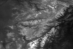

In [79]:
# create map centered on the Dataset
map = fm.Map(location=[data.lat.values.mean(), 
                       data.lon.values.mean()],
             zoom_start=7, tiles="Stamen Terrain")

# create colormap
cmap = cm.LinearColormap(colors=['white', 'blue'],
                             index=[0, 100], vmin=0, vmax=100,
                             caption='Precipitation [mm]')

# add precip raster layer
img = fm.raster_layers.ImageOverlay(
        name="2099",
        image=data_tf['precipitation'].data,
        bounds=[[data_tf.lat.data[0], data_tf.lon.data[0]], [data_tf.lat.data[-1], data_tf.lon.data[-1]]],
        opacity=0.9,
        # colormap=cmap,
        interactive=True,
        cross_origin=False,
        zindex=1,
    )

img.add_to(map)
map.add_child(cmap)
fm.LayerControl().add_to(map)

pn.panel(map, height=500, width=500)

### Precip over time scatterplot

In [ ]:
# co2_vs_gdp_scatterplot_pipeline = (
#     idf[
#         (idf.year == year_slider) &
#         (~ (idf.country.isin(continents)))
#     ]
#     .groupby(['country', 'year', 'gdp_per_capita'])['co2'].mean()
#     .to_frame()
#     .reset_index()
#     .sort_values(by='year')  
#     .reset_index(drop=True)
# )
# co2_vs_gdp_scatterplot_pipeline

In [ ]:
# co2_vs_gdp_scatterplot = co2_vs_gdp_scatterplot_pipeline.hvplot(x='gdp_per_capita', 
#                                                                 y='co2', 
#                                                                 by='country', 
#                                                                 size=80, kind="scatter", 
#                                                                 alpha=0.7,
#                                                                 legend=False, 
#                                                                 height=500, 
#                                                                 width=500)
# co2_vs_gdp_scatterplot

### Creating Dashboard

In [ ]:
# #Layout using Template
# template = pn.template.FastListTemplate(
#     title='World CO2 emission dashboard', 
#     sidebar=[pn.pane.Markdown("# CO2 Emissions and Climate Change"), 
#              pn.pane.Markdown("#### Carbon dioxide emissions are the primary driver of global climate change. It’s widely recognised that to avoid the worst impacts of climate change, the world needs to urgently reduce emissions. But, how this responsibility is shared between regions, countries, and individuals has been an endless point of contention in international discussions."), 
#              # pn.pane.PNG('climate_day.png', sizing_mode='scale_both'),
#              pn.pane.Markdown("## Settings"),   
#              year_slider],
#     main=[pn.Row(pn.Column(yaxis_co2, 
#                            co2_plot.panel(width=700), margin=(0,25)), 
#                  co2_table.panel(width=500)), 
#           pn.Row(pn.Column(co2_vs_gdp_scatterplot.panel(width=600), margin=(0,25)), 
#                  pn.Column(yaxis_co2_source, co2_source_bar_plot.panel(width=600)))],
#     accent_base_color="#88d8b0",
#     header_background="#88d8b0",
# )
# # template.show()
# template.servable();